In [1]:
import pandas as pd
import numpy as np

### Import Data

In [6]:
psych = pd.read_csv('../Data/Processed_Data/cleaned.csv')

In [3]:
psych.head()

,Unnamed: 0,Drug_Name,Condition,Rating,usefulCount,Drug_Class,Reviews
0,0,Guanfacine,ADHD,8.0,192,alpha agonists,my son is halfway through his fourth week of i...
1,1,Aripiprazole,Bipolar Disorde,10.0,32,atypical antipsychotics,abilify changed my life there is hope i was on...
2,2,L-methylfolate,Depression,10.0,54,B vitamin,i have taken antidepressants for years with so...
3,3,Lamotrigine,Bipolar Disorde,10.0,18,anticonvulsants,ive been on every medicine under the sun it se...
4,4,Daytrana,ADHD,10.0,11,central nervous system stimulants,hi all my son who is was diagnosed when he wa...


In [4]:
psych.shape

(30968, 7)

### Reclassifying Conditions to Classes of Mental Health Disorders

In [5]:
psych['Condition'].value_counts()

Depression                          8866
Anxiety                             5836
Bipolar Disorde                     4175
ADHD                                3351
Anxiety and Stress                  1662
Major Depressive Disorde            1595
Panic Disorde                       1457
Generalized Anxiety Disorde         1164
Schizophrenia                        594
Obsessive Compulsive Disorde         574
Schizoaffective Disorde              395
Social Anxiety Disorde               389
Post Traumatic Stress Disorde        309
mance Anxiety                        187
Borderline Personality Disorde       151
Postpartum Depression                 84
Psychosis                             73
Sexual Dysfunction, SSRI Induced      50
Paranoid Disorde                      38
Nightmares                            18
Name: Condition, dtype: int64

**8 Classes of Mental Disorders:**

**Depressive Disorders**: Depression, Major Depressive Disorde, Postpartum Depression<br>
**Anxiety Disodrders**: Anxiety, Anxiety and Stress, Panic Disorde, Generalized Anxiety Disorder, Social Anxiety Disorde, mance Anxiety<br>
**Neurodevelopmental Disorders**: ADHD<br>
**Psychotic Disorders**: Schizophrenia, Psychosis, Schizoaffective Disorde<br>
**Obsessive-Compulsive Disorders**: Obssessive Compulsive Disorde<br>
**Trauma-related Disorders**: Post Traumatic Stress Disorde, Nightmares<br>
**Bipolar Disorders**: Bipolar Disorde<br>
**Personality Disorders**: Borderline Personality Disorde, Paranoid Disorde<br>
**Sexual Dysfunctions**: Sexual Dysfunction, SSRI Induced<br>
<br>Source: https://www.mayoclinic.org/diseases-conditions/mental-illness/diagnosis-treatment/drc-20374974

In [6]:
replace_values = {'Depression': 'Depressive Disorders', 'Major Depressive Disorde': 'Depressive Disorders',
                                 'Postpartum Depression': 'Depressive Disorders', 'Anxiety': 'Anxiety Disorders', 'Anxiety and Stress': 'Anxiety Disorders', 
                                 'Panic Disorde': 'Anxiety Disorders', 'Generalized Anxiety Disorde': 'Anxiety Disorders', 'Social Anxiety Disorde': 'Anxiety Disorders',
                                 'mance Anxiety': 'Anxiety Disorders', 'ADHD': 'Neurodevelopmental Disorders', 'Schizophrenia': 'Psychotic Disorders',
                                 'Psychosis': 'Psychotic Disorders', 'Schizoaffective Disorde': 'Psychotic Disorders',
                                 'Obsessive Compulsive Disorde': 'Obsessive-Compulsive Disorders', 'Post Traumatic Stress Disorde':'Trauma-related Disorders', 'Nightmares':'Trauma-related Disorders',
                                 'Bipolar Disorde': 'Bipolar Disorders', 'Borderline Personality Disorde': 'Personality Disorders', 'Paranoid Disorde': 'Personality Disorders',
                                 'Sexual Dysfunction, SSRI Induced': 'Sexual Dysfunctions'}

In [7]:
psych = psych.replace({'Condition': replace_values})

In [8]:
psych['Condition'].value_counts()

Anxiety Disorders                 10695
Depressive Disorders              10545
Bipolar Disorders                  4175
Neurodevelopmental Disorders       3351
Psychotic Disorders                1062
Obsessive-Compulsive Disorders      574
Trauma-related Disorders            327
Personality Disorders               189
Sexual Dysfunctions                  50
Name: Condition, dtype: int64

Deciding to drop conditions <100 values (even though I will still have to work with imbalanced classes ~ this would mitigate the issue a bit)

In [9]:
psych = psych[psych.Condition != 'Sexual Dysfunctions']    

In [11]:
psych = psych.drop(columns = 'Unnamed: 0', axis = 1)

In [12]:
groups = pd.DataFrame(psych.groupby(by = ['Condition', 'Drug_Class']).count())

In [13]:
groups.sort_values('Condition', ascending = True)

Drug_Name  Rating  \
Condition                Drug_Class                                             
Anxiety Disorders        Anxiolytics                              258     258   
                         conventional antipsychotics               14      14   
                         central nervous system stimulants         20      20   
                         beta blockers                            321     321   
                         benzodiazepines                         2505    2505   
...                                                               ...     ...   
Trauma-related Disorders SSRI                                     127     127   
                         TeCA                                      16      16   
                         anticonvulsants                           11      11   
                         antihypertensives                         57      57   
                         tricyclic antidepressants                  8       8   

                                                            usefulCount  \
Condition                Drug_Class                                       
Anxiety Disorders        Anxiolytics                                258   
                         conventional antipsychotics                 14   
                         central nervous system stimulants           20   
                         beta blockers                              321   
                         benzodiazepines                           2505   
...                                                                 ...   
Trauma-related Disorders SSRI                                       127   
                         TeCA                                        16   
                         anticonvulsants                             11   
                         antihypertensives                           57   
                         tricyclic antidepressants                    8   

                                                            Reviews  
Condition                Drug_Class                                  
Anxiety Disorders        Anxiolytics                            258  
                         conventional antipsychotics             14  
                         central nervous system stimulants       20  
                         beta blockers                          321  
                         benzodiazepines                       2505  
...                                                             ...  
Trauma-related Disorders SSRI                                   127  
                         TeCA                                    16  
                         anticonvulsants                         11  
                         antihypertensives                       57  
                         tricyclic antidepressants                8  

[73 rows x 4 columns]

In [14]:
groups_csv = groups.to_csv('../Data/Processed_Data/DrugsbyGroup.csv')

## EDA on Reviews 

### Count & TFIDF Vectorizer ~ Check for Common Words

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Check for unigrams
cvec = CountVectorizer(stop_words = 'english', ngram_range = (1,1))

cvec1 = cvec.fit_transform(psych['Reviews'])

cvec_df1 = pd.DataFrame(cvec1.todense(), columns = cvec.get_feature_names_out())

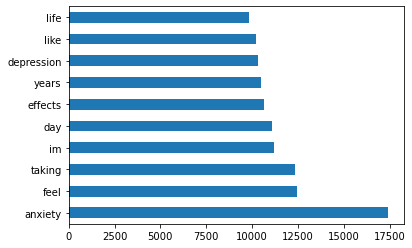

In [17]:
#Plot as bar graph

cvec_df1.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [9]:
#Check for bigrams
cvec2 = CountVectorizer(stop_words = 'english', ngram_range = (2,2), max_features = 10)

cvec_2 = cvec2.fit_transform(psych['Reviews'])

cvec_df2 = pd.DataFrame(cvec_2.todense(), columns = cvec2.get_feature_names_out())

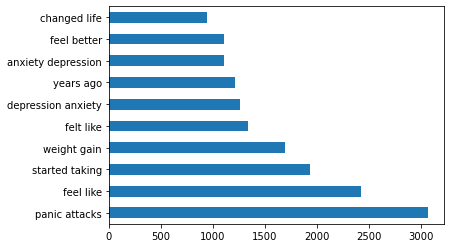

In [10]:
cvec_df2.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tvec = TfidfVectorizer(stop_words = 'english')

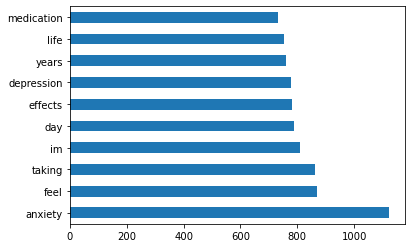

In [21]:
tvec_df = pd.DataFrame(tvec.fit_transform(psych['Reviews']).todense(), 
                          columns=tvec.get_feature_names_out())

# plot top occuring words
tvec_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');


### VADER Sentiment Scores

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [23]:
sia = SentimentIntensityAnalyzer()

In [24]:
corpus = list(psych['Reviews'])

In [25]:
sia.polarity_scores(corpus[0])

{'neg': 0.018, 'neu': 0.87, 'pos': 0.112, 'compound': 0.9172}

In [26]:
sentiment = []

for reviews in corpus:
    scores = sia.polarity_scores(reviews)
    scores['Reviews'] = reviews
    sentiment.append(scores)

df1 = pd.DataFrame(sentiment)
df1.head()

,neg,neu,pos,compound,Reviews
0,0.018,0.870,0.112,0.9172,my son is halfway through his fourth week of i...
1,0.163,0.751,0.087,-0.9089,abilify changed my life there is hope i was on...
2,0.223,0.563,0.214,0.0147,i have taken antidepressants for years with so...
3,0.120,0.824,0.056,-0.7852,ive been on every medicine under the sun it se...
4,0.100,0.817,0.083,-0.5673,hi all my son who is was diagnosed when he wa...


In [28]:
df1.tail()

,neg,neu,pos,compound,Reviews
30913,0.096,0.789,0.116,0.2291,i was in a very bad place at the time i starte...
30914,0.272,0.601,0.126,-0.9284,had panic attacks and social anxiety starting ...
30915,0.284,0.716,0.000,-0.9286,this is the third med ive tried for anxiety an...
30916,0.200,0.746,0.053,-0.9746,i was super against taking medication ive star...
30917,0.098,0.758,0.143,0.6724,i have been off prozac for about weeks nowaft...


In [41]:
df1.shape

(30918, 5)

In [29]:
from statistics import mean

In [30]:
mean(df1['compound'])

-0.05050408823339155

In [31]:
max(df1['compound'])

0.9955

In [32]:
min(df1['compound'])

-0.9984

In [35]:
df1['compound'].value_counts(bins = 10, ascending = False)

(-1.001, -0.799]      7326
(0.796, 0.996]        5551
(0.597, 0.796]        3379
(-0.799, -0.6]        3178
(0.397, 0.597]        2338
(-0.6, -0.4]          2333
(-0.00145, 0.198]     1953
(0.198, 0.397]        1781
(-0.4, -0.201]        1667
(-0.201, -0.00145]    1412
Name: compound, dtype: int64

In [65]:
df1_csv = df1.to_csv('../Data/Processed_Data/SentiScores.csv', index = False)

**Note:** Decided to export as CSV and re-import prior to merging with main dataset because merge wasn't initally working

In [66]:
senti = pd.read_csv('../Data/Processed_Data/SentiScores.csv')

Decided to only use compound score for analysis, since the compound score reflects the positive, negative and neutral combined; plus I will be using other text review data so want to limit my features to some extent.

In [157]:
senti = senti.drop(columns = ['neg', 'neu', 'pos', 'Merge'], axis = 1)

In [158]:
senti.dtypes

compound    float64
Reviews      object
dtype: object

In [191]:
senti.shape

(30918, 2)

In [163]:
psych.dtypes

Drug_Name       object
Condition       object
Rating         float64
usefulCount      int64
Drug_Class      object
Reviews         object
dtype: object

In [199]:
psych.shape

(30918, 6)

In [179]:
senti.head()

,compound,Reviews
0,0.9172,my son is halfway through his fourth week of i...
1,-0.9089,abilify changed my life there is hope i was on...
2,0.0147,i have taken antidepressants for years with so...
3,-0.7852,ive been on every medicine under the sun it se...
4,-0.5673,hi all my son who is was diagnosed when he wa...


**Note**: Had to reset index prior to merging as the index was off and the rows from the sentiment scores df were not matching with original df

In [203]:
psych.reset_index(inplace = True)

In [205]:
senti_df = pd.merge(psych, senti, left_index = True, right_index = True)

In [206]:
senti_df.shape

(30918, 9)

In [211]:
senti_df = senti_df.drop(columns = 'Reviews_y', axis = 1)

In [213]:
senti_df = senti_df.drop(columns = 'index', axis = 1)

In [215]:
senti_df = senti_df.rename(columns = {'Reviews_x': 'Reviews'})

In [216]:
senti_df.head()

,Drug_Name,Condition,Rating,usefulCount,Drug_Class,Reviews,compound
0,Guanfacine,Neurodevelopmental Disorders,8.0,192,alpha agonists,my son is halfway through his fourth week of i...,0.9172
1,Aripiprazole,Bipolar Disorders,10.0,32,atypical antipsychotics,abilify changed my life there is hope i was on...,-0.9089
2,L-methylfolate,Depressive Disorders,10.0,54,B vitamin,i have taken antidepressants for years with so...,0.0147
3,Lamotrigine,Bipolar Disorders,10.0,18,anticonvulsants,ive been on every medicine under the sun it se...,-0.7852
4,Daytrana,Neurodevelopmental Disorders,10.0,11,central nervous system stimulants,hi all my son who is was diagnosed when he wa...,-0.5673


**Note**: Decided to export as csv & re-import so I can use for later modeling if needed

In [220]:
senti_csv = senti_df.to_csv('../Data/Processed_Data/SentiMerged.csv', index = False)

### EDA for Condition, Drug Class, & Rating

In [13]:
senti = pd.read_csv('../Data/Processed_Data/SentiMerged.csv')

In [222]:
senti.head()

,Drug_Name,Condition,Rating,usefulCount,Drug_Class,Reviews,compound
0,Guanfacine,Neurodevelopmental Disorders,8.0,192,alpha agonists,my son is halfway through his fourth week of i...,0.9172
1,Aripiprazole,Bipolar Disorders,10.0,32,atypical antipsychotics,abilify changed my life there is hope i was on...,-0.9089
2,L-methylfolate,Depressive Disorders,10.0,54,B vitamin,i have taken antidepressants for years with so...,0.0147
3,Lamotrigine,Bipolar Disorders,10.0,18,anticonvulsants,ive been on every medicine under the sun it se...,-0.7852
4,Daytrana,Neurodevelopmental Disorders,10.0,11,central nervous system stimulants,hi all my son who is was diagnosed when he wa...,-0.5673


Dropping 'usefulCount' since I won't be using in analysis

In [14]:
senti = senti.drop(columns = 'usefulCount', axis = 1)

In [225]:
senti.head()

,Drug_Name,Condition,Rating,Drug_Class,Reviews,compound
0,Guanfacine,Neurodevelopmental Disorders,8.0,alpha agonists,my son is halfway through his fourth week of i...,0.9172
1,Aripiprazole,Bipolar Disorders,10.0,atypical antipsychotics,abilify changed my life there is hope i was on...,-0.9089
2,L-methylfolate,Depressive Disorders,10.0,B vitamin,i have taken antidepressants for years with so...,0.0147
3,Lamotrigine,Bipolar Disorders,10.0,anticonvulsants,ive been on every medicine under the sun it se...,-0.7852
4,Daytrana,Neurodevelopmental Disorders,10.0,central nervous system stimulants,hi all my son who is was diagnosed when he wa...,-0.5673


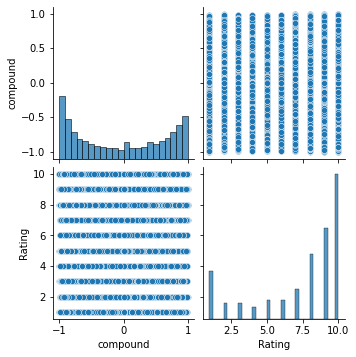

In [22]:
sns.pairplot(senti, vars = ['compound', 'Rating'])

In [20]:
senti['compound'].corr(senti['Rating'])

0.3015565276097855

In [38]:
replace2 = {'Anxiolytics: anxiolytics'}

In [39]:
senti = senti.replace({'Drug_Class': replace2})

<AxesSubplot:>

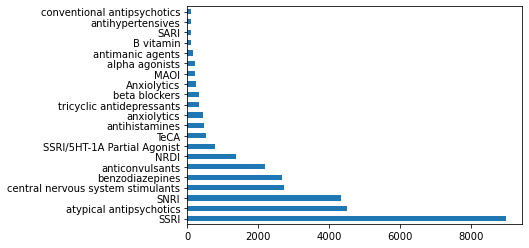

In [40]:
senti['Drug_Class'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

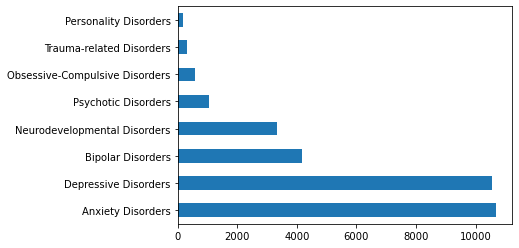

In [41]:
senti['Condition'].value_counts().plot(kind = 'barh')

[Text(0, 0, 'alpha agonists'),
 Text(1, 0, 'atypical antipsychotics'),
 Text(2, 0, 'B vitamin'),
 Text(3, 0, 'anticonvulsants'),
 Text(4, 0, 'central nervous system stimulants'),
 Text(5, 0, 'benzodiazepines'),
 Text(6, 0, 'SSRI'),
 Text(7, 0, 'conventional antipsychotics'),
 Text(8, 0, 'SNRI'),
 Text(9, 0, 'NRDI'),
 Text(10, 0, 'antimanic agents'),
 Text(11, 0, 'TeCA'),
 Text(12, 0, 'anxiolytics'),
 Text(13, 0, 'beta blockers'),
 Text(14, 0, 'tricyclic antidepressants'),
 Text(15, 0, 'SSRI/5HT-1A Partial Agonist'),
 Text(16, 0, 'SARI'),
 Text(17, 0, 'Anxiolytics'),
 Text(18, 0, 'MAOI'),
 Text(19, 0, 'antihistamines'),
 Text(20, 0, 'antihypertensives')]

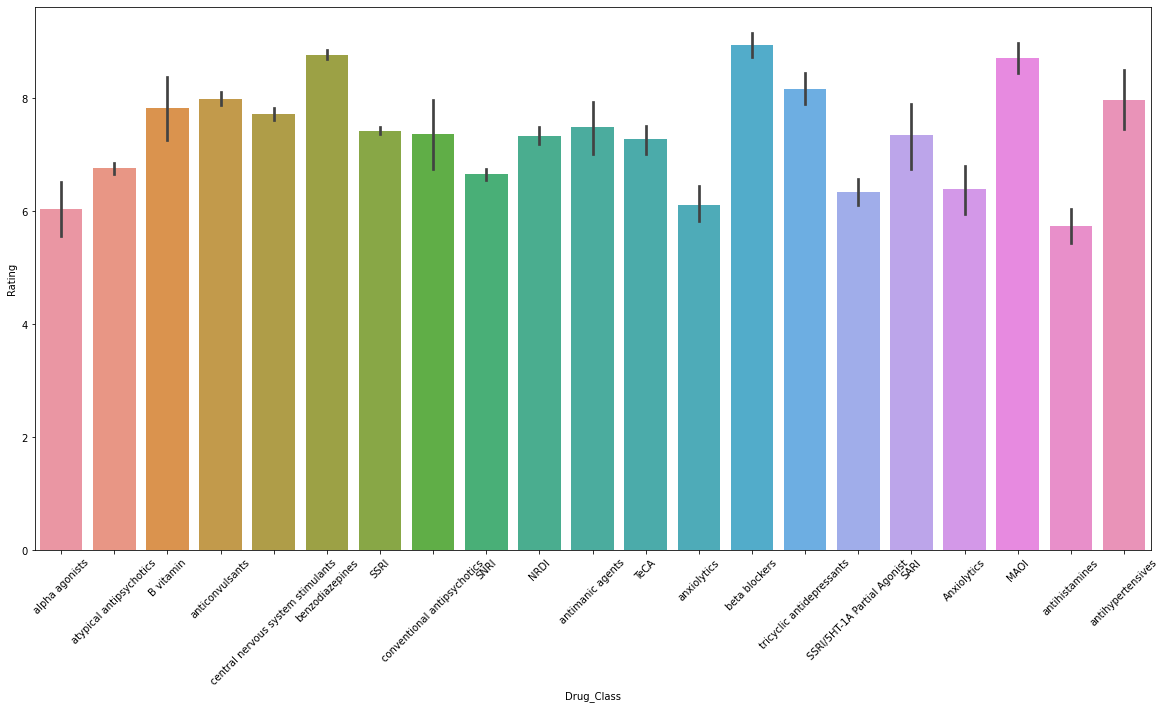

In [241]:
plt.figure(figsize = (20,10))
plot = sns.barplot(x = senti['Drug_Class'], y = senti['Rating'], data = senti)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)

In [44]:
senti['compound'].value_counts(bins = 10, ascending = False)

(-1.001, -0.799]      7326
(0.796, 0.996]        5551
(0.597, 0.796]        3379
(-0.799, -0.6]        3178
(0.397, 0.597]        2338
(-0.6, -0.4]          2333
(-0.00145, 0.198]     1953
(0.198, 0.397]        1781
(-0.4, -0.201]        1667
(-0.201, -0.00145]    1412
Name: compound, dtype: int64

In [54]:
senti['Rating'].value_counts(ascending = False)

10.0    9750
9.0     6150
8.0     4345
1.0     3249
7.0     2015
5.0     1271
6.0     1246
2.0     1059
3.0     1049
4.0      784
Name: Rating, dtype: int64

**Note**: These data points above will be used to generate bar graphs on excel for data visualization

### Getting Data Ready for Modeling

Compound score is between -1 to 1, but some of the models I want to try (i.e. multinomial Naive Bayes) doesn't work well with negative values. Will convert to positive scores:

In [55]:
senti['compound1'] = senti['compound'] + 1 

In [56]:
senti['compound1'].min()

0.0016000000000000458

In [57]:
senti['compound1'].max()

1.9955

Converting categorical columns to dummy variables:

In [58]:
dummies1 = pd.get_dummies(senti['Condition'])

In [59]:
dummies2 = pd.get_dummies(senti['Drug_Class'])

In [60]:
dummies1.shape

(30918, 8)

In [61]:
dummies2.shape

(30918, 21)

Vectorizing cleaned 'Reviews' data for analysis (using TFIDF):

In [64]:
tfidf = TfidfVectorizer(min_df = 0.1, max_df = 0.75, stop_words = 'english')

In [65]:
text = senti['Reviews']

In [66]:
tfidf.fit(text)

TfidfVectorizer(max_df=0.75, min_df=0.1, stop_words='english')

In [67]:
text_to_df = tfidf.transform(text)

In [68]:
tfidf_df = pd.DataFrame(text_to_df.todense(), columns=tfidf.get_feature_names_out())

In [69]:
features = tfidf.get_feature_names_out()

In [70]:
len(features)

48

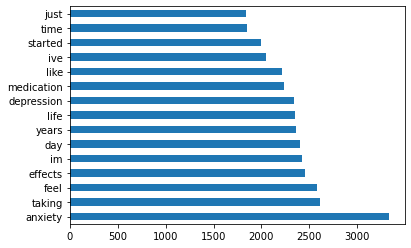

In [71]:
tfidf_df.sum().sort_values(ascending = False).head(15).plot(kind = 'barh');

In [72]:
tfidf_df.shape

(30918, 48)

In [75]:
merge_dummies = pd.concat([senti, dummies1, dummies2], axis = 1)

In [77]:
merge_dummies.head()

,Drug_Name,Condition,Rating,Drug_Class,Reviews,compound,compound1,Anxiety Disorders,Bipolar Disorders,Depressive Disorders,...,antihistamines,antihypertensives,antimanic agents,anxiolytics,atypical antipsychotics,benzodiazepines,beta blockers,central nervous system stimulants,conventional antipsychotics,tricyclic antidepressants
0,Guanfacine,Neurodevelopmental Disorders,8.0,alpha agonists,my son is halfway through his fourth week of i...,0.9172,1.9172,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aripiprazole,Bipolar Disorders,10.0,atypical antipsychotics,abilify changed my life there is hope i was on...,-0.9089,0.0911,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,L-methylfolate,Depressive Disorders,10.0,B vitamin,i have taken antidepressants for years with so...,0.0147,1.0147,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Lamotrigine,Bipolar Disorders,10.0,anticonvulsants,ive been on every medicine under the sun it se...,-0.7852,0.2148,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Daytrana,Neurodevelopmental Disorders,10.0,central nervous system stimulants,hi all my son who is was diagnosed when he wa...,-0.5673,0.4327,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
merge_final = pd.merge(merge_dummies, tfidf_df, left_index = True, right_index = True)

In [80]:
merge_final.head()

,Drug_Name,Condition,Rating,Drug_Class,Reviews,compound,compound1,Anxiety Disorders,Bipolar Disorders,Depressive Disorders,...,took,tried,week,weeks,weight,went,work,worked,year,years
0,Guanfacine,Neurodevelopmental Disorders,8.0,alpha agonists,my son is halfway through his fourth week of i...,0.9172,1.9172,0,0,0,...,0.0,0.231364,0.466684,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Aripiprazole,Bipolar Disorders,10.0,atypical antipsychotics,abilify changed my life there is hope i was on...,-0.9089,0.0911,0,1,0,...,0.0,0.328339,0.000000,0.0,0.000000,0.336281,0.0,0.000000,0.000000,0.000000
2,L-methylfolate,Depressive Disorders,10.0,B vitamin,i have taken antidepressants for years with so...,0.0147,1.0147,0,0,1,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.320926
3,Lamotrigine,Bipolar Disorders,10.0,anticonvulsants,ive been on every medicine under the sun it se...,-0.7852,0.2148,0,1,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Daytrana,Neurodevelopmental Disorders,10.0,central nervous system stimulants,hi all my son who is was diagnosed when he wa...,-0.5673,0.4327,0,0,0,...,0.0,0.486605,0.000000,0.0,0.500136,0.249187,0.0,0.261021,0.253855,0.183790


In [81]:
merge_final = merge_final.drop(columns = ['Condition', 'Drug_Class', 'Reviews', 'compound'])

In [85]:
merge_final = merge_final.drop(columns = 'Drug_Name', axis = 1)

In [86]:
merge_final.head()

,Rating,compound1,Anxiety Disorders,Bipolar Disorders,Depressive Disorders,Neurodevelopmental Disorders,Obsessive-Compulsive Disorders,Personality Disorders,Psychotic Disorders,Trauma-related Disorders,...,took,tried,week,weeks,weight,went,work,worked,year,years
0,8.0,1.9172,0,0,0,1,0,0,0,0,...,0.0,0.231364,0.466684,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,10.0,0.0911,0,1,0,0,0,0,0,0,...,0.0,0.328339,0.000000,0.0,0.000000,0.336281,0.0,0.000000,0.000000,0.000000
2,10.0,1.0147,0,0,1,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.320926
3,10.0,0.2148,0,1,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,10.0,0.4327,0,0,0,1,0,0,0,0,...,0.0,0.486605,0.000000,0.0,0.500136,0.249187,0.0,0.261021,0.253855,0.183790


In [87]:
merge_final.shape

(30918, 79)

### Export Modeling Dataset to csv:

In [88]:
merge_csv = merge_final.to_csv('../Data/Processed_Data/MergedFinal.csv')